In [191]:
import warnings
warnings.filterwarnings('ignore')

In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report

In [193]:
df=pd.read_csv('Churn_Modelling.csv')

In [194]:
df.shape

(10000, 14)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [196]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Columns like RowNumber,CustomerId,Surname will not affect the Target column 'Exited' So dropping the above columns

In [197]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [198]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Start Of EDA
1. Handling missing values

In [199]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values

2. Handling Outliers


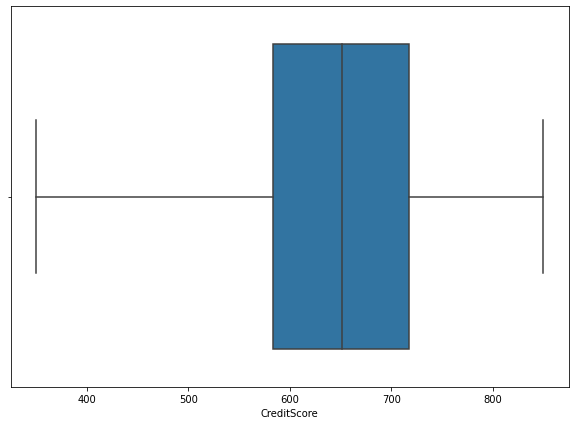

In [200]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='CreditScore',whis=2)
plt.show()

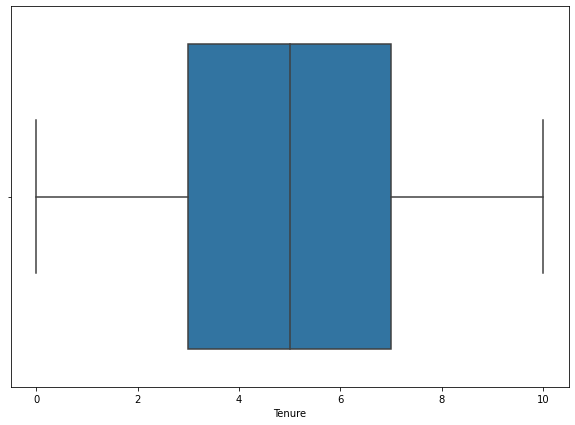

In [201]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='Tenure')
plt.show()

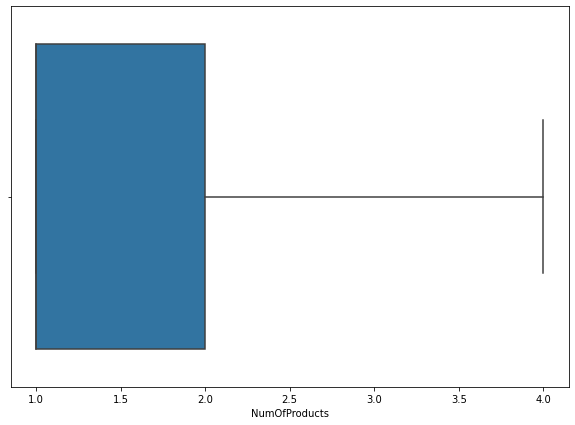

In [202]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='NumOfProducts',whis=2)
plt.show()

As seen with whis=2 there is no outlier


3. Handling Categorical Data

In [203]:
#Separate categorical and numerical colums
df_cat = df[['Geography','Gender','HasCrCard','IsActiveMember','Exited']]
df_num = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]

In [204]:
from sklearn.preprocessing import LabelEncoder

In [205]:
for col in df_cat.drop('Exited',axis=1):
  le=LabelEncoder()
  df_cat[col]=le.fit_transform(df_cat[col])
print(df_cat.head())

   Geography  Gender  HasCrCard  IsActiveMember  Exited
0          0       0          1               1       1
1          2       0          0               1       0
2          0       0          1               0       1
3          0       0          0               0       0
4          2       0          1               1       0


4. Handling Skewness


In [206]:
from scipy.stats import skew 

CreditScore = -0.07159586676212397


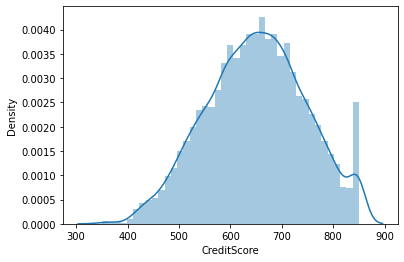

**********************************************
Age = 1.0111685586628079


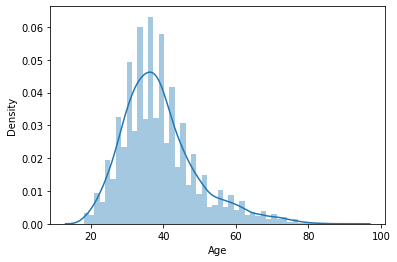

**********************************************
Tenure = 0.010989809189781041


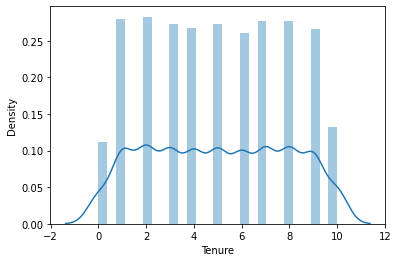

**********************************************
Balance = -0.14108754375291138


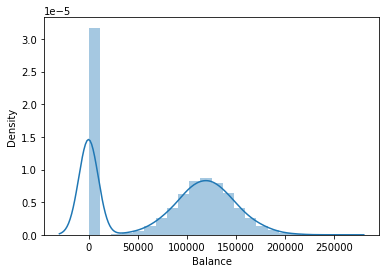

**********************************************
NumOfProducts = 0.745456048438949


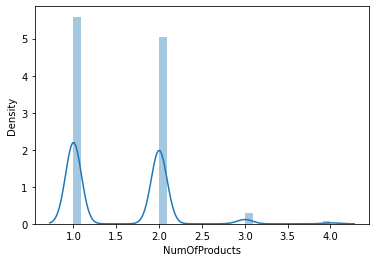

**********************************************
EstimatedSalary = 0.0020850448448748848


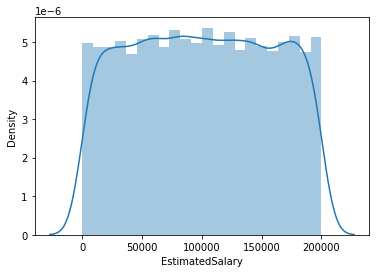

**********************************************


In [207]:
for col in df_num:
  try:
    print(col,"=",skew(df_num[col]))
    sns.distplot(df_num[col])
    plt.show()
  except:
    pass
  finally:
    print("**********************************************")

As seen above we can see there is positive skewness for 
1. Age
2. NumOfProducts

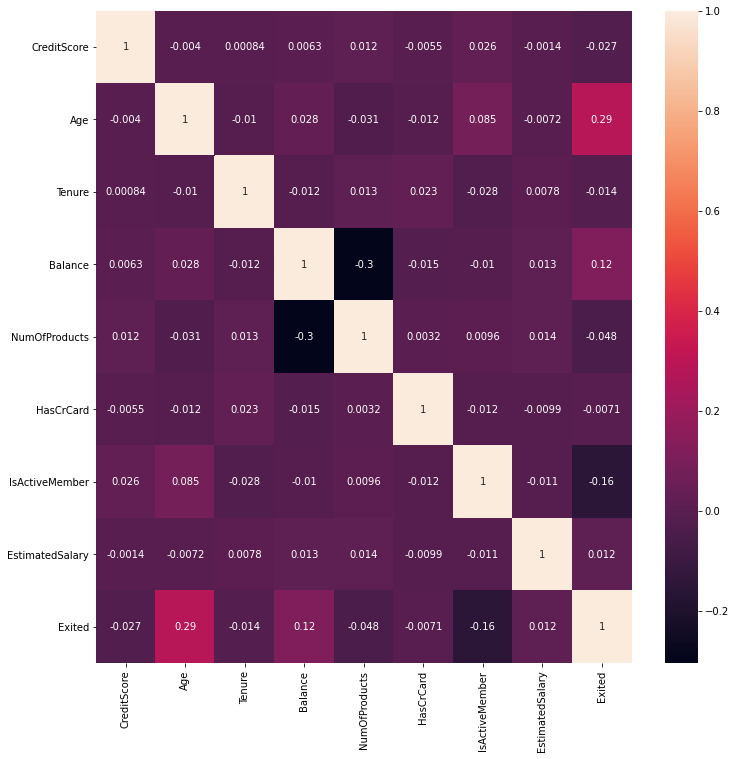

In [208]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [209]:
print(min(df['Age']))
print(max(df['Age']))

18
92


In [210]:
skewed_data = np.sqrt(df_num['Age'])
skew(skewed_data)

0.5933159623197802

In [211]:
print(min(df['NumOfProducts']))
print(max(df['NumOfProducts'])) 

1
4


In [212]:
skewed_data = np.sqrt(df_num['NumOfProducts'])
skew(skewed_data)

0.4204651463627845

As per analysis we will reduce skewness as follows:
1. Age - sqrt
2. NumOfProducts - sqrt

In [213]:
df_num['Age'] =  np.sqrt(df_num['Age'])
df_num['NumOfProducts'] =  np.sqrt(df_num['NumOfProducts'])

#merge dataframes to make it complete


In [214]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [215]:
from sklearn.preprocessing import StandardScaler
for col in df_new.drop('Exited',axis=1):
  ss = StandardScaler()
  df_new[col] = ss.fit_transform(df_new[[col]])
df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,-0.326221,0.363279,-1.041760,-1.225848,-0.940717,0.021886,-0.901886,-1.095988,0.646092,0.970243,1
1,-0.440036,0.267739,-1.387538,0.117350,-0.940717,0.216534,1.515067,-1.095988,-1.547768,0.970243,0
2,-1.536794,0.363279,1.032908,1.333053,2.253455,0.240687,-0.901886,-1.095988,0.646092,-1.030670,1
3,0.501521,0.073098,-1.387538,-1.225848,0.866630,-0.108918,-0.901886,-1.095988,-1.547768,-1.030670,0
4,2.063884,0.457688,-1.041760,0.785728,-0.940717,-0.365276,1.515067,-1.095988,0.646092,0.970243,0


This is completion of EDA process

In [216]:
from sklearn.model_selection import train_test_split


In [217]:
y = df_new["Exited"]
x = df_new.drop("Exited",axis=1)

In [218]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

As seen this in an imbalanced dataset. We will apply resampling techniques



In [219]:
def ANN(x_train,x_test,y_train,y_test):
  model = tf.keras.Sequential([
      
      tf.keras.layers.Dense(8, activation="relu", input_shape=(x.shape[1],)),
      tf.keras.layers.Dense(6, activation="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid")
      
  ])
  model.compile(optimizer="adam", loss="binary_crossentropy")
  trained_model = model.fit(x_train, y_train, epochs=50,batch_size=10)
  plt.plot(trained_model.history["loss"])
  y_pred = model.predict(x_test)
  y_pred = np.where(y_pred >= 0.5,1,0)
  
  print(classification_report(y_test,y_pred))
  return y_pred

1. Undersampling

In [220]:
count_class_0, count_class_1 = df_new.Exited.value_counts()

In [221]:
count_class_0

7963

In [222]:
count_class_1

2037

In [223]:
df_class_0 = df_new[df_new['Exited']==0]
df_class_1 = df_new[df_new['Exited']==1]

In [224]:
df_class_0_under = df_class_0.sample(count_class_1)

In [225]:
df_class_0_under.shape

(2037, 11)

In [226]:
df_undersampling = pd.concat([df_class_0_under,df_class_1],axis=0)

Epoch 1/50
286/286 [==============================] - 1s 963us/step - loss: 0.6957
Epoch 2/50
286/286 [==============================] - 0s 925us/step - loss: 0.6552
Epoch 3/50
286/286 [==============================] - 0s 983us/step - loss: 0.5989
Epoch 4/50
286/286 [==============================] - 0s 1ms/step - loss: 0.5654
Epoch 5/50
286/286 [==============================] - 0s 1ms/step - loss: 0.5448
Epoch 6/50
286/286 [==============================] - 0s 1ms/step - loss: 0.5435
Epoch 7/50
286/286 [==============================] - 0s 986us/step - loss: 0.5512
Epoch 8/50
286/286 [==============================] - 0s 1ms/step - loss: 0.5228
Epoch 9/50
286/286 [==============================] - 0s 1000us/step - loss: 0.5083
Epoch 10/50
286/286 [==============================] - 0s 1ms/step - loss: 0.5045
Epoch 11/50
286/286 [==============================] - 0s 1ms/step - loss: 0.4944
Epoch 12/50
286/286 [==============================] - 0s 954us/step - loss: 0.5004
Epoch 13/50


array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

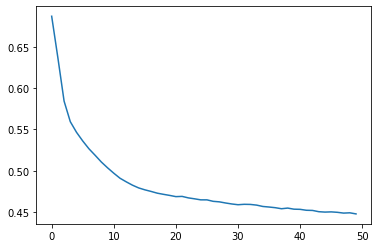

In [227]:
x = df_undersampling.drop('Exited',axis='columns')
y = df_undersampling['Exited']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=15,stratify=y)
ANN(x_train,x_test,y_train,y_test)

Undersampling gives accuracy score 75%

2. Oversampling Technique

In [228]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_oversampling = pd.concat([df_class_0,df_class_1_over],axis=0)
df_oversampling['Exited'].value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Epoch 1/50
1115/1115 [==============================] - 1s 976us/step - loss: 0.6734
Epoch 2/50
1115/1115 [==============================] - 1s 972us/step - loss: 0.5958
Epoch 3/50
1115/1115 [==============================] - 1s 988us/step - loss: 0.5620
Epoch 4/50
1115/1115 [==============================] - 1s 990us/step - loss: 0.5409
Epoch 5/50
1115/1115 [==============================] - 1s 975us/step - loss: 0.5198
Epoch 6/50
1115/1115 [==============================] - 1s 969us/step - loss: 0.5086
Epoch 7/50
1115/1115 [==============================] - 1s 979us/step - loss: 0.4985
Epoch 8/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4931
Epoch 9/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4787
Epoch 10/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4743
Epoch 11/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4851
Epoch 12/50
1115/1115 [==============================] - 1s 1ms/step - 

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

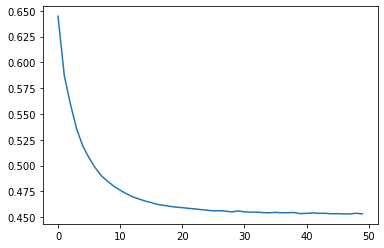

In [229]:
x = df_oversampling.drop('Exited',axis='columns')
y = df_oversampling['Exited']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=15,stratify=y)
ANN(x_train,x_test,y_train,y_test)

Oversampling score gives 78%

3. Using SMOTE(Synthetic Minority Oversampling Technique)

Epoch 1/50
1115/1115 [==============================] - 1s 937us/step - loss: 0.6660
Epoch 2/50
1115/1115 [==============================] - 1s 944us/step - loss: 0.5706
Epoch 3/50
1115/1115 [==============================] - 1s 974us/step - loss: 0.5273
Epoch 4/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4903
Epoch 5/50
1115/1115 [==============================] - 1s 952us/step - loss: 0.4790
Epoch 6/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4709
Epoch 7/50
1115/1115 [==============================] - 1s 966us/step - loss: 0.4544
Epoch 8/50
1115/1115 [==============================] - 1s 1ms/step - loss: 0.4593
Epoch 9/50
1115/1115 [==============================] - 1s 970us/step - loss: 0.4538
Epoch 10/50
1115/1115 [==============================] - 1s 965us/step - loss: 0.4531
Epoch 11/50
1115/1115 [==============================] - 1s 990us/step - loss: 0.4453
Epoch 12/50
1115/1115 [==============================] - 1s 969us/ste

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

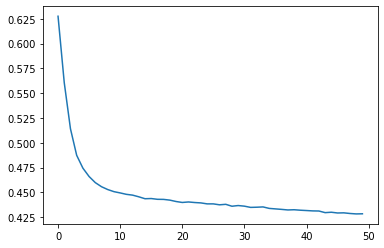

In [230]:
x = df_new.drop('Exited',axis='columns')
y = df_new['Exited']

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_sample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.3,random_state=15,stratify=y_sm)
ANN(x_train,x_test,y_train,y_test)

SMOTE score gives 80%

4.Use of Ensemble with undersampling

In [231]:
X = df_new.drop('Exited',axis='columns')
y = df_new['Exited']

In [232]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15,stratify=y)

In [233]:
temp_df = x_train.copy()
temp_df['Exited'] = y_train

In [234]:
df3_class_0 = temp_df[temp_df['Exited']==0]
df3_class_1 = temp_df[temp_df['Exited']==1]

In [235]:
df3_class_0.shape

(5574, 11)

In [236]:
df3_class_1.shape

(1426, 11)

In [237]:
5574/1426

3.908835904628331

In [238]:
5574/4

1393.5

In [239]:
def get_train_batch(df_majority,df_minority,start,end):
  df_train = pd.concat([df_majority[start:end],df_minority],axis=0)

  x_train = df_train.drop('Exited',axis='columns')
  y_train = df_train.Exited

  return x_train,y_train

Epoch 1/50
282/282 [==============================] - 1s 959us/step - loss: 0.7644
Epoch 2/50
282/282 [==============================] - 0s 1ms/step - loss: 0.6311
Epoch 3/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5839
Epoch 4/50
282/282 [==============================] - 0s 937us/step - loss: 0.5840
Epoch 5/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5627
Epoch 6/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5417
Epoch 7/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5291
Epoch 8/50
282/282 [==============================] - 0s 954us/step - loss: 0.5323
Epoch 9/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5183
Epoch 10/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5394
Epoch 11/50
282/282 [==============================] - 0s 979us/step - loss: 0.5259
Epoch 12/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5159
Epoch 13/50
282/2

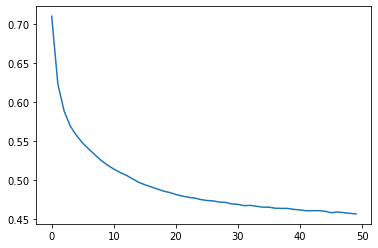

In [240]:
x_train, y_train = get_train_batch(df3_class_0,df3_class_1,0,1393)
y_pred1=ANN(x_train,x_test,y_train,y_test)

Epoch 1/50
282/282 [==============================] - 1s 952us/step - loss: 0.6872
Epoch 2/50
282/282 [==============================] - 0s 1ms/step - loss: 0.6182
Epoch 3/50
282/282 [==============================] - 0s 971us/step - loss: 0.5900
Epoch 4/50
282/282 [==============================] - 0s 957us/step - loss: 0.5823
Epoch 5/50
282/282 [==============================] - 0s 947us/step - loss: 0.5439
Epoch 6/50
282/282 [==============================] - 0s 978us/step - loss: 0.5380
Epoch 7/50
282/282 [==============================] - 0s 944us/step - loss: 0.5329
Epoch 8/50
282/282 [==============================] - 0s 954us/step - loss: 0.5277
Epoch 9/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5224
Epoch 10/50
282/282 [==============================] - 0s 991us/step - loss: 0.5109
Epoch 11/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5028
Epoch 12/50
282/282 [==============================] - 0s 981us/step - loss: 0.4979
Epoch 1

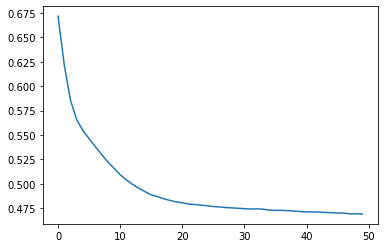

In [241]:
x_train, y_train = get_train_batch(df3_class_0,df3_class_1,1393,2786)
y_pred2=ANN(x_train,x_test,y_train,y_test)

Epoch 1/50
282/282 [==============================] - 1s 1ms/step - loss: 0.7095
Epoch 2/50
282/282 [==============================] - 0s 975us/step - loss: 0.6239
Epoch 3/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5967
Epoch 4/50
282/282 [==============================] - 0s 963us/step - loss: 0.5766
Epoch 5/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5757
Epoch 6/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5603
Epoch 7/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5592
Epoch 8/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5612
Epoch 9/50
282/282 [==============================] - 0s 982us/step - loss: 0.5537
Epoch 10/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5561
Epoch 11/50
282/282 [==============================] - 0s 998us/step - loss: 0.5491
Epoch 12/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5422
Epoch 13/50
282/2

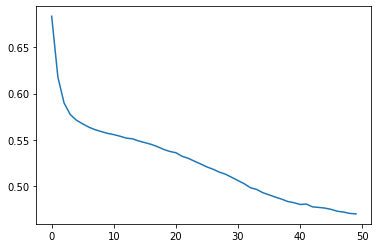

In [242]:
x_train, y_train = get_train_batch(df3_class_0,df3_class_1,2787,4180)
y_pred3=ANN(x_train,x_test,y_train,y_test)

Epoch 1/50
282/282 [==============================] - 1s 1ms/step - loss: 0.7039
Epoch 2/50
282/282 [==============================] - 0s 947us/step - loss: 0.6337
Epoch 3/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5965
Epoch 4/50
282/282 [==============================] - 0s 924us/step - loss: 0.5760
Epoch 5/50
282/282 [==============================] - 0s 951us/step - loss: 0.5593
Epoch 6/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5524
Epoch 7/50
282/282 [==============================] - 0s 972us/step - loss: 0.5502
Epoch 8/50
282/282 [==============================] - 0s 947us/step - loss: 0.5198
Epoch 9/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5225
Epoch 10/50
282/282 [==============================] - 0s 980us/step - loss: 0.5323
Epoch 11/50
282/282 [==============================] - 0s 990us/step - loss: 0.5121
Epoch 12/50
282/282 [==============================] - 0s 1ms/step - loss: 0.5092
Epoch 13/50

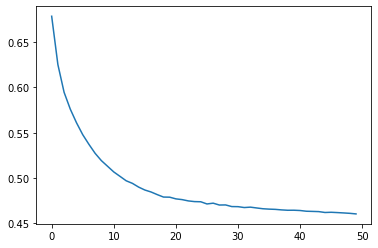

In [243]:
x_train, y_train = get_train_batch(df3_class_0,df3_class_1,4181,5574)
y_pred4=ANN(x_train,x_test,y_train,y_test)

In [244]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
  n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]+y_pred4[i]

  if n_ones>2:
    y_pred_final[i]=1
  else:
    y_pred_final[i]=0

In [245]:
print(classification_report(y_test,y_pred_final))



              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2389
           1       0.49      0.71      0.58       611

    accuracy                           0.79      3000
   macro avg       0.70      0.76      0.72      3000
weighted avg       0.83      0.79      0.80      3000



Ensembling gives 79%

So we can say that SMOTE is good model with score of 80 %